# Scatter Plots

## Load Libraries

In [1]:
from obspy import UTCDateTime
from scipy.signal import welch
from tqdm import tqdm
from pathlib import Path

import os, sys
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# from andbro__store_as_pickle import __store_as_pickle

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [3]:
## ---------------------------------------

name0 = "FFBI"

name1 = "DROMY_N"
name2 = "DROMY_E"


# t1 ,t2 = "2023-09-23", "2023-10-23"

In [4]:
# ## ---------------------------------------

config = {}

## specify paths
config['path_to_figs'] = data_path+f"LNM2/figures/scatter/"

config['path_to_data'] = data_path+f"LNM2/data/"

config['path_to_data'] = data_path+f"LNM2/data/"

## Methods

In [5]:
dat1 = pd.read_pickle(config['path_to_data']+name0+".pkl")
dat2 = pd.read_pickle(config['path_to_data']+name2+".pkl")

In [6]:
def __get_octave_bands(fmin, fmax, fband_type="octave", plot=False):

    """
    Computing octave / one-third-octave bands

    Arguments:
        - fmin:    (float) minimum center frequency
        - fmax:    (float) maximum center frequency
        - fband_type:    [octave] / one-third-octave
        - plot:    (bool) show frequency bands

    Example:

    >>> flower, fupper, fcenter = __get_octave_bands(f_min, f_max, fband_type="octave", plot=False)

    """

    import matplotlib.pyplot as plt
    from numpy import sqrt, array
    from acoustics import bands

    f_lower, f_upper, f_centers = [], [], []

    if fband_type == "octave":
        f_centers = bands.octave(fmin, fmax)
        f_lower = bands.octave_low(fmin, fmax)
        f_upper = bands.octave_high(fmin, fmax)

    if fband_type == "one-third-octave":
        f_centers = bands.third(fmin, fmax)
        f_lower = bands.third_low(fmin, fmax)
        f_upper = bands.third_high(fmin, fmax)

    if plot:
        plt.figure()
        for fl, fc, fu in zip(f_lower, f_centers, f_upper):
            plt.axvline(fu, color="r")
            plt.axvline(fl, color="r")
            plt.axvline(fc)
            plt.axvline(fmin, color="g")
            plt.axvline(fmax, color="g")
            plt.xscale("log")
        plt.show()

    return array(f_lower), array(f_upper), array(f_centers)

In [7]:
def __quantile_regression(x, y, quantiles=[0.05, 0.5, 0.95]):


    from sklearn.utils.fixes import parse_version, sp_version
    from sklearn.linear_model import QuantileRegressor
    from numpy import newaxis, zeros_like, bool_, logical_or, array

    # This is line is to avoid incompatibility if older SciPy version.
    # You should use `solver="highs"` with recent version of SciPy.
    solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"

    predictions = {}

    x = array(x)
    X = x[:, newaxis]

    out_bounds_predictions = zeros_like(y, dtype=bool_)

    for quantile in quantiles:
        qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
        y_pred = qr.fit(X, y).predict(X)
        predictions[quantile] = y_pred

        if quantile == min(quantiles):
            out_bounds_predictions = logical_or(
                out_bounds_predictions, y_pred >= y
            )
        elif quantile == max(quantiles):
            out_bounds_predictions = logical_or(
                out_bounds_predictions, y_pred <= y
            )

    # print(qr.score(X, y))
    return predictions

In [8]:
def __compute_orthogonal_distance_regression(x_array, y_array, xerr=None, yerr=None, bx=None, by=None):

    from scipy import odr
    from numpy import power, mean, std

    if bx is None and by is None:
        bx, by = 0, mean(y_array)/mean(x_array)

    if xerr is None and yerr is None:
        xerr, yerr = std(x_array), std(y_array)

#     data = odr.RealData(x_array, y_array)
    data = odr.Data(x_array, y_array, wd=1./xerr, we=1./yerr)

    odr = odr.ODR(data, model=odr.unilinear)

    output = odr.run()

    slope, intercept = output.beta

    return slope, intercept

## Plot all 

In [9]:
dat0 = pd.read_pickle(config['path_to_data']+name0+".pkl")

dat1 = pd.read_pickle(config['path_to_data']+name1+".pkl")
dat2 = pd.read_pickle(config['path_to_data']+name2+".pkl")


coh1 = pd.read_pickle(config['path_to_data']+name1+"_coherence.pkl")
coh2 = pd.read_pickle(config['path_to_data']+name2+"_coherence.pkl")


0.8175219617741383


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 0.9 - 1.1 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 0.9 - 1.1 mHz')

Text(0.05, 0.04, 'N=657')

Text(0.05, 0.04, 'N=660')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

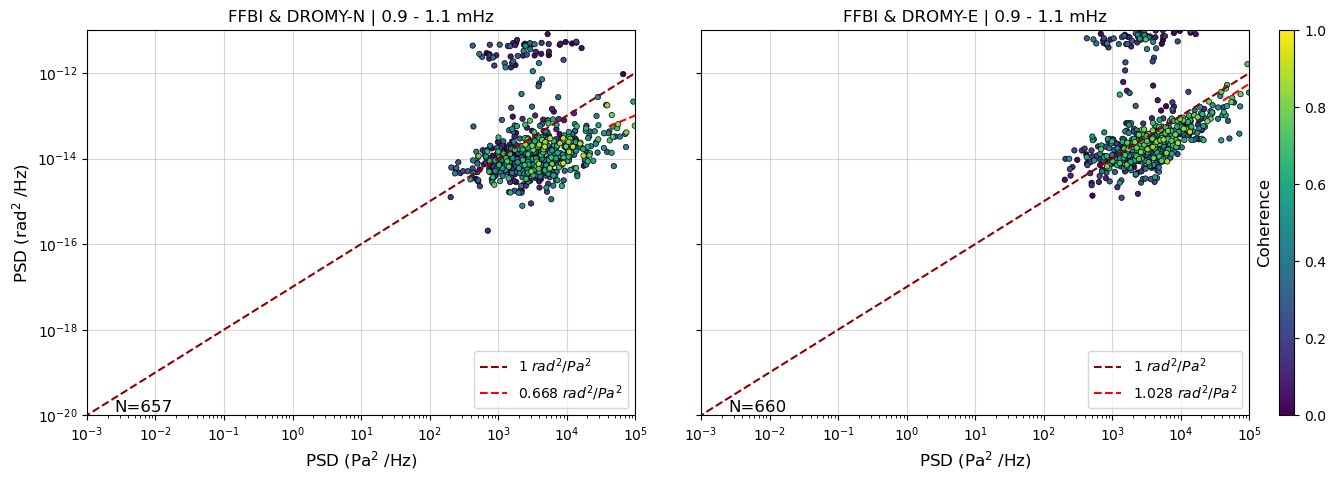

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


min() arg is an empty sequence


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 1.1 - 1.4 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 1.1 - 1.4 mHz')

Text(0.05, 0.04, 'N=0')

Text(0.05, 0.04, 'N=0')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

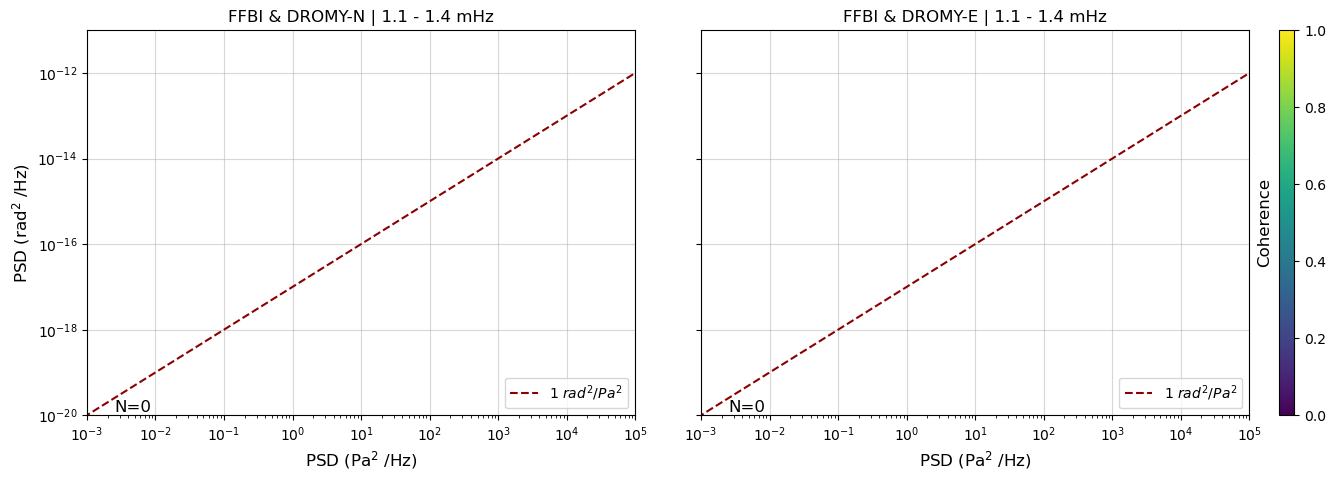

0.8920494914737251


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 1.4 - 1.8 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 1.4 - 1.8 mHz')

Text(0.05, 0.04, 'N=661')

Text(0.05, 0.04, 'N=689')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

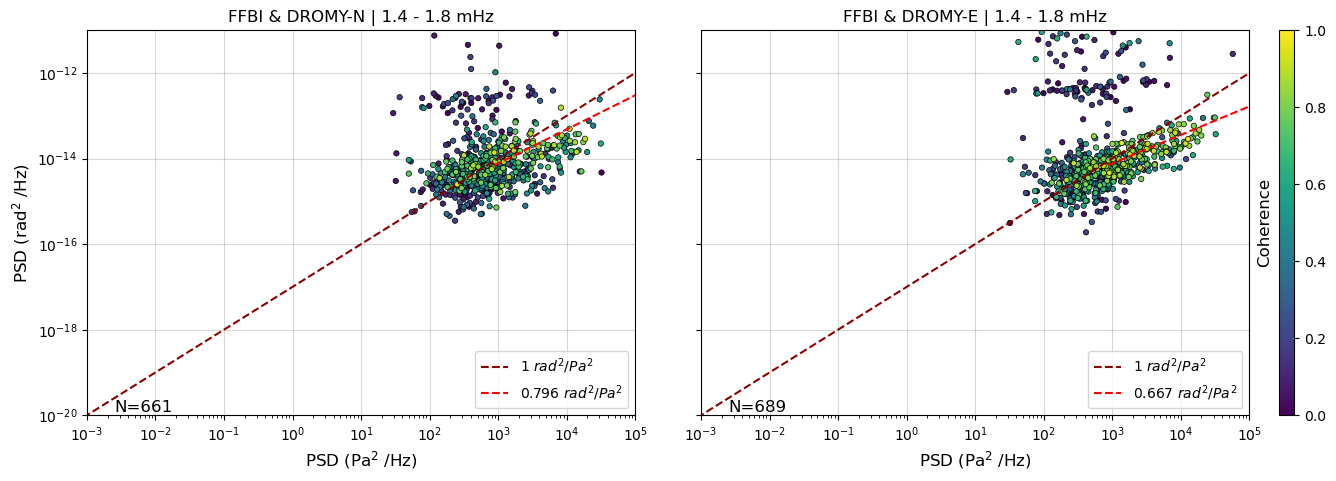

0.849724337587861


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 1.8 - 2.2 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 1.8 - 2.2 mHz')

Text(0.05, 0.04, 'N=670')

Text(0.05, 0.04, 'N=699')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

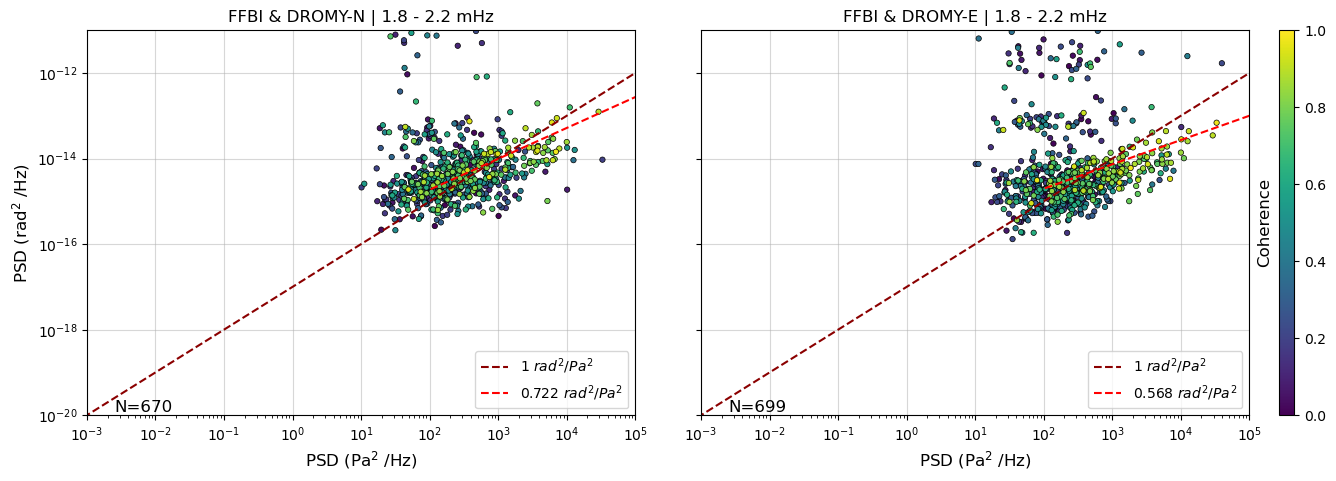

0.9026761533769824


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 2.2 - 2.8 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 2.2 - 2.8 mHz')

Text(0.05, 0.04, 'N=681')

Text(0.05, 0.04, 'N=702')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

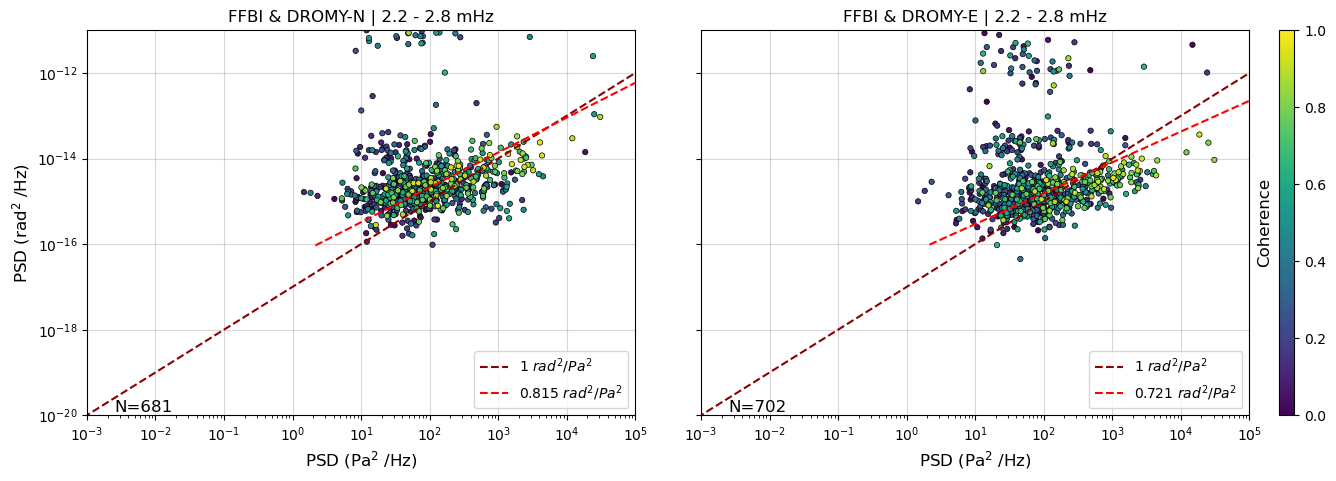

0.7420692982525473


/tmp/ipykernel_129002/1969860314.py:74: RuntimeWarning: invalid value encountered in sqrt
  complN[_n], complE[_n] = np.sqrt(odr1_slope), np.sqrt(odr2_slope)


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 2.8 - 3.5 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 2.8 - 3.5 mHz')

Text(0.05, 0.04, 'N=688')

Text(0.05, 0.04, 'N=708')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

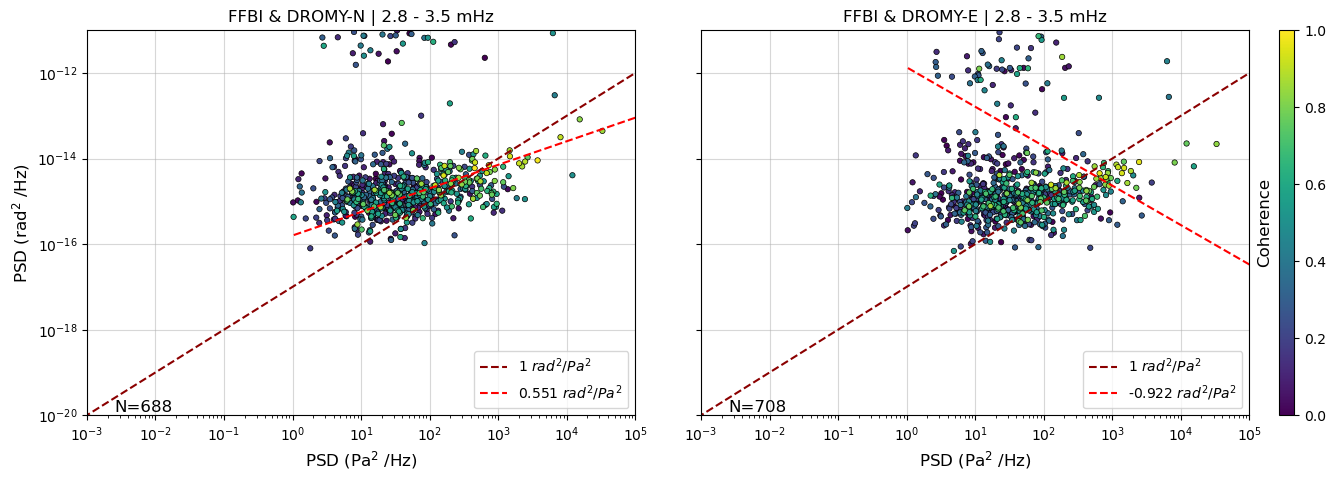

0.6817825168928449


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 3.6 - 4.5 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 3.6 - 4.5 mHz')

Text(0.05, 0.04, 'N=700')

Text(0.05, 0.04, 'N=718')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

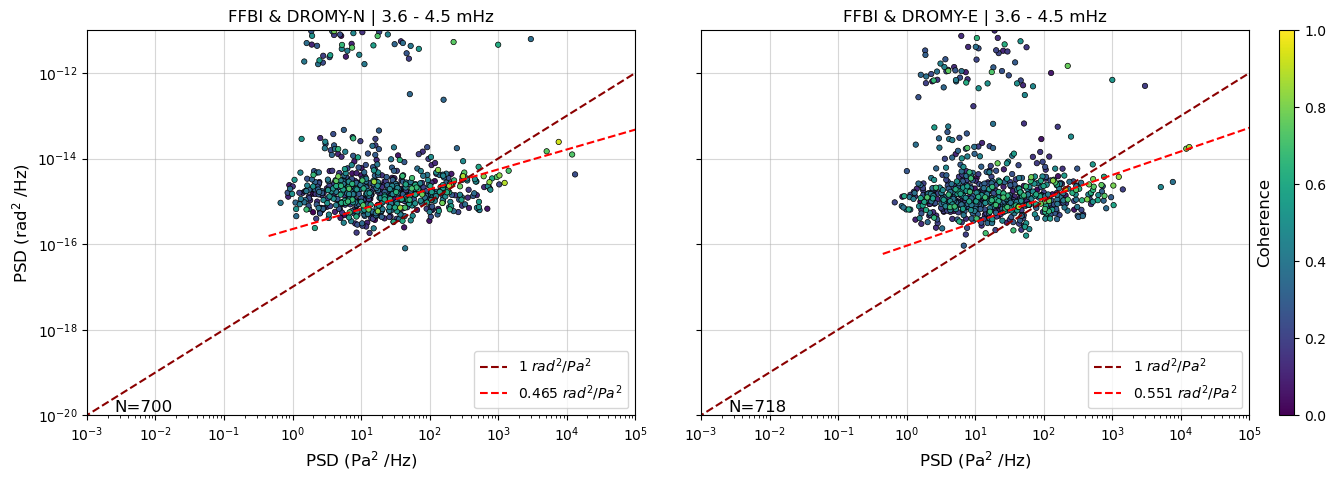

nan


/tmp/ipykernel_129002/1969860314.py:74: RuntimeWarning: invalid value encountered in sqrt
  complN[_n], complE[_n] = np.sqrt(odr1_slope), np.sqrt(odr2_slope)
/tmp/ipykernel_129002/1969860314.py:75: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(odr1_slope))


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 4.5 - 5.6 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 4.5 - 5.6 mHz')

Text(0.05, 0.04, 'N=716')

Text(0.05, 0.04, 'N=718')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

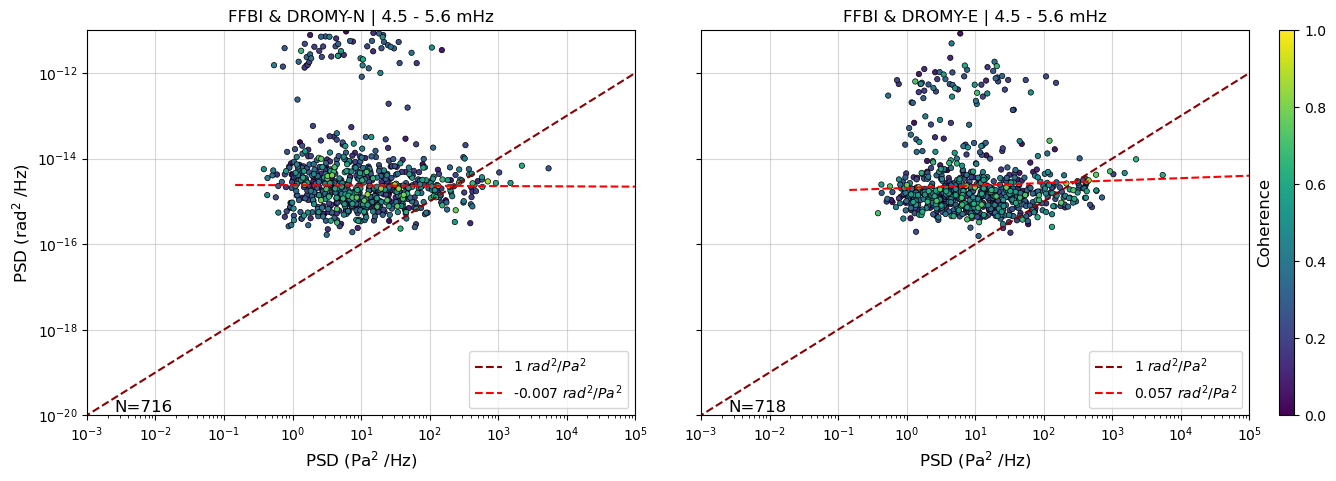

float division by zero


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 5.6 - 7.1 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 5.6 - 7.1 mHz')

Text(0.05, 0.04, 'N=718')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

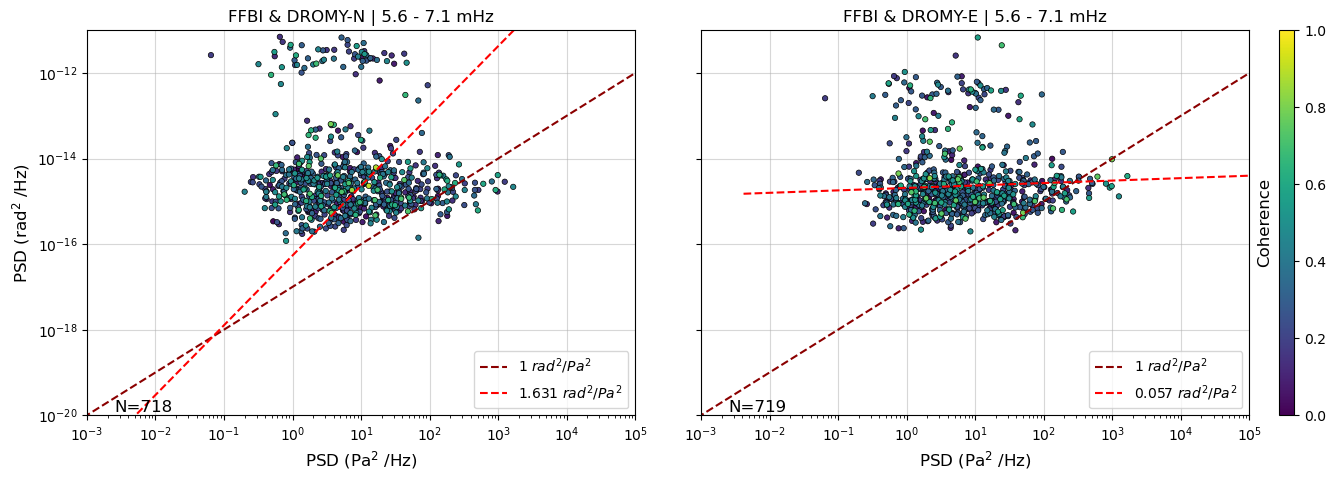

float division by zero


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 7.1 - 9.0 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 7.1 - 9.0 mHz')

Text(0.05, 0.04, 'N=718')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

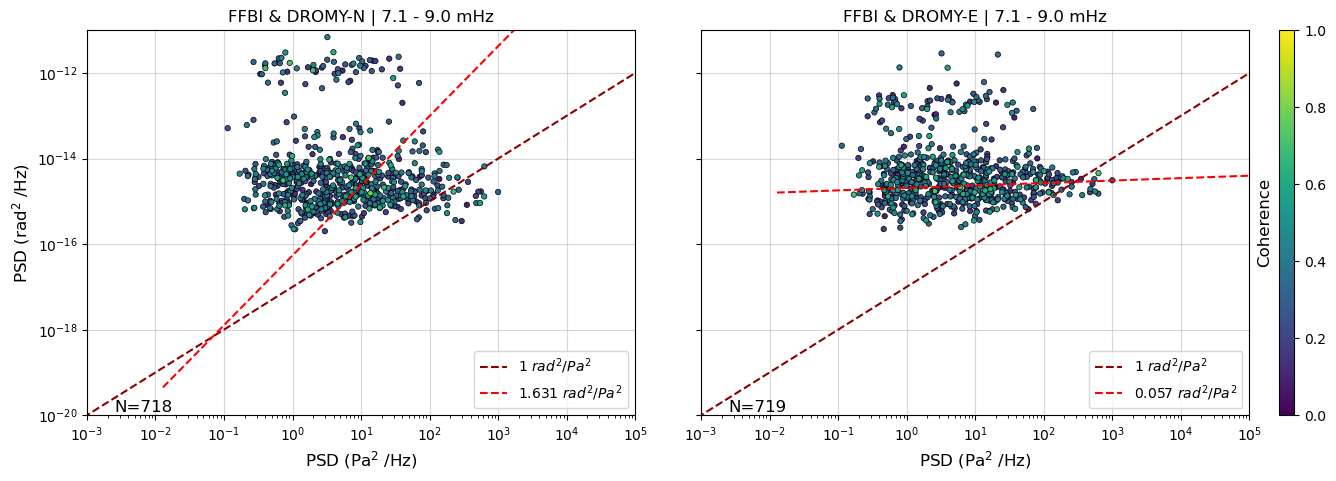

float division by zero


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 8.9 - 11.2 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 8.9 - 11.2 mHz')

Text(0.05, 0.04, 'N=718')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

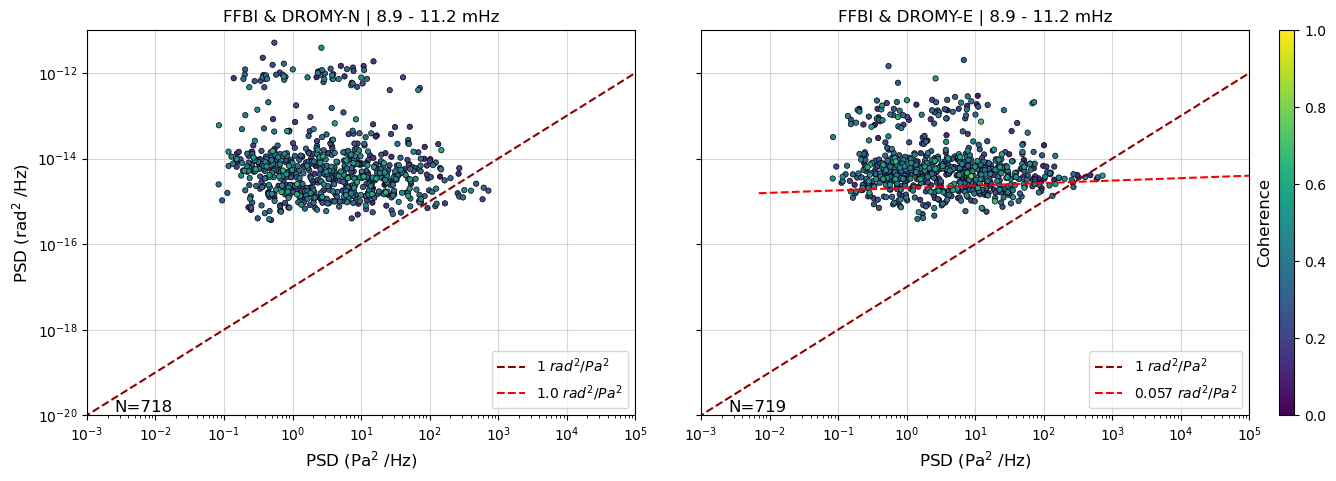

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 11.1 - 14.0 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 11.1 - 14.0 mHz')

Text(0.05, 0.04, 'N=719')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

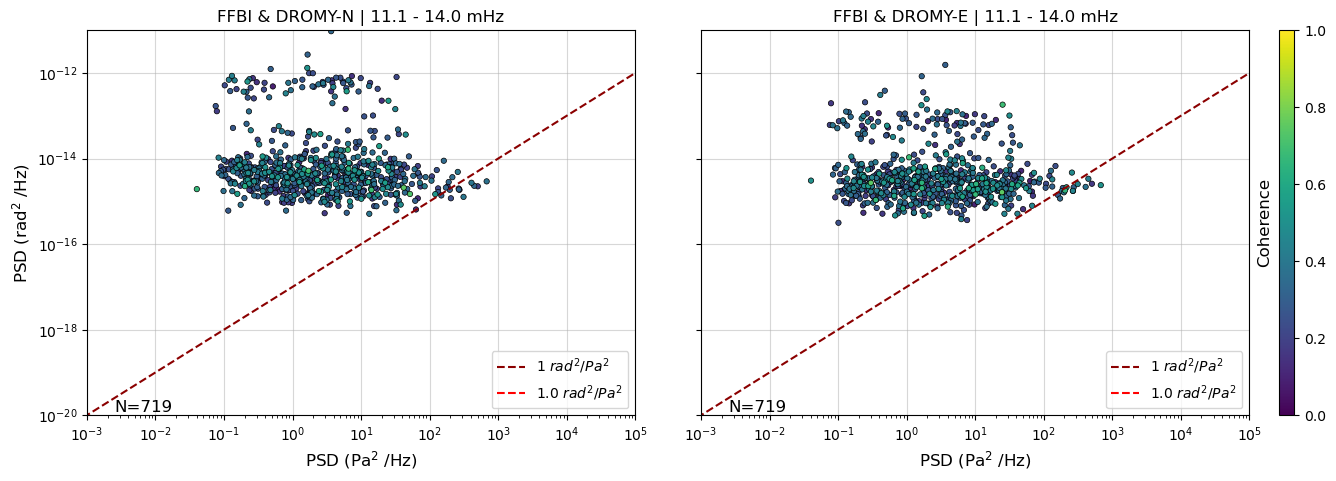

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 14.3 - 18.0 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 14.3 - 18.0 mHz')

Text(0.05, 0.04, 'N=719')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

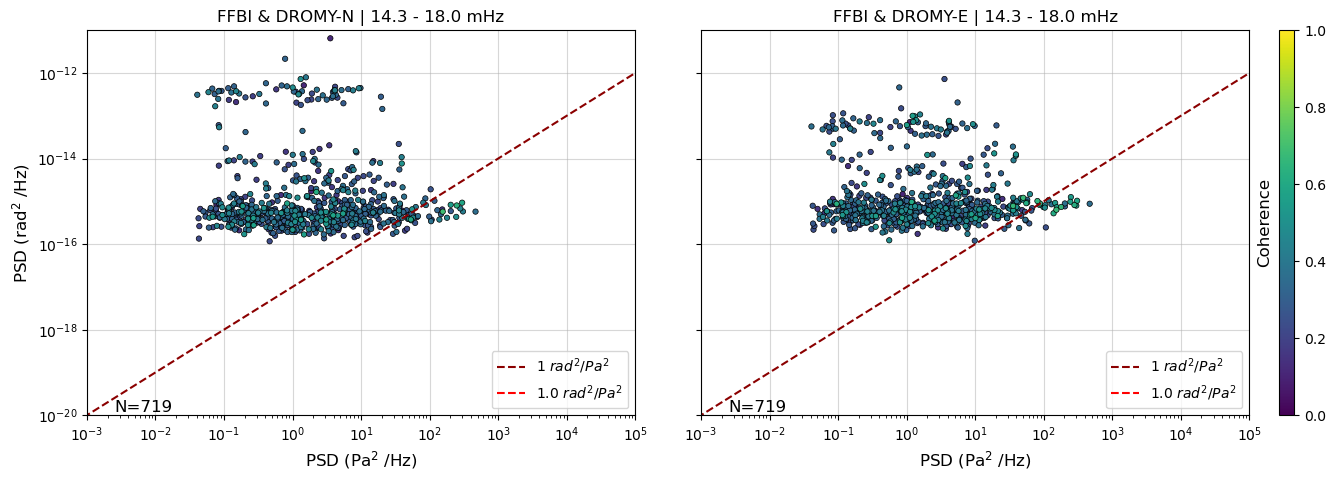

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 17.8 - 22.4 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 17.8 - 22.4 mHz')

Text(0.05, 0.04, 'N=719')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

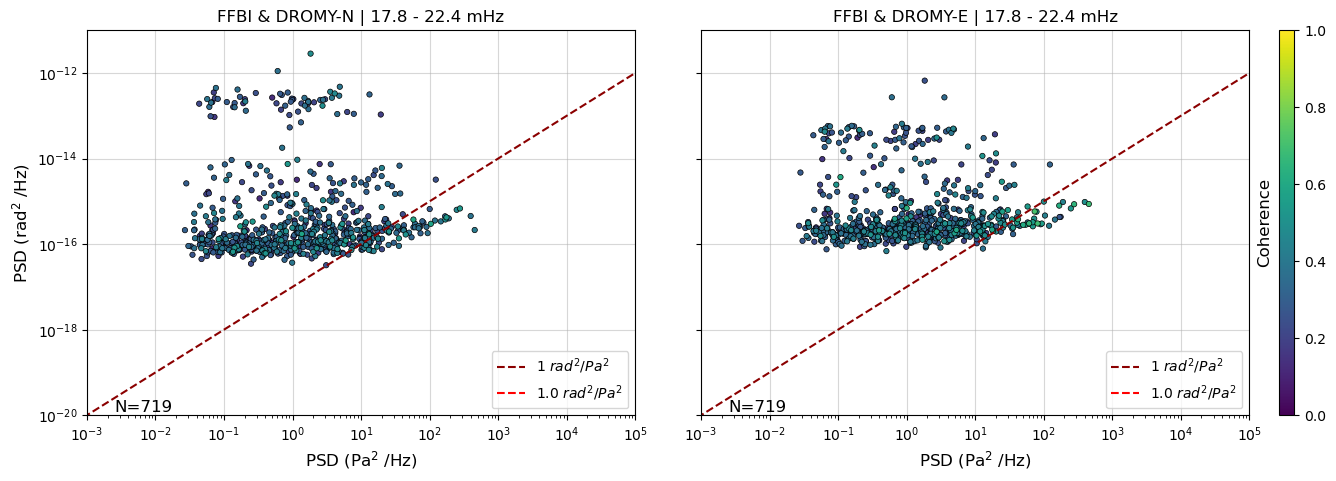

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 22.3 - 28.1 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 22.3 - 28.1 mHz')

Text(0.05, 0.04, 'N=719')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

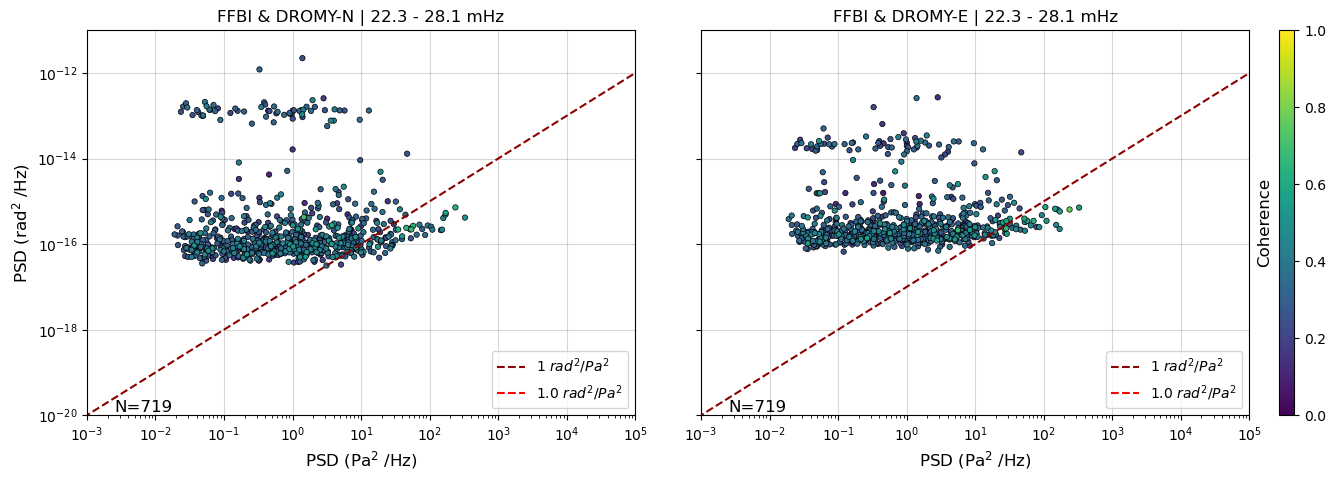

float division by zero


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 28.1 - 35.4 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 28.1 - 35.4 mHz')

Text(0.05, 0.04, 'N=719')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

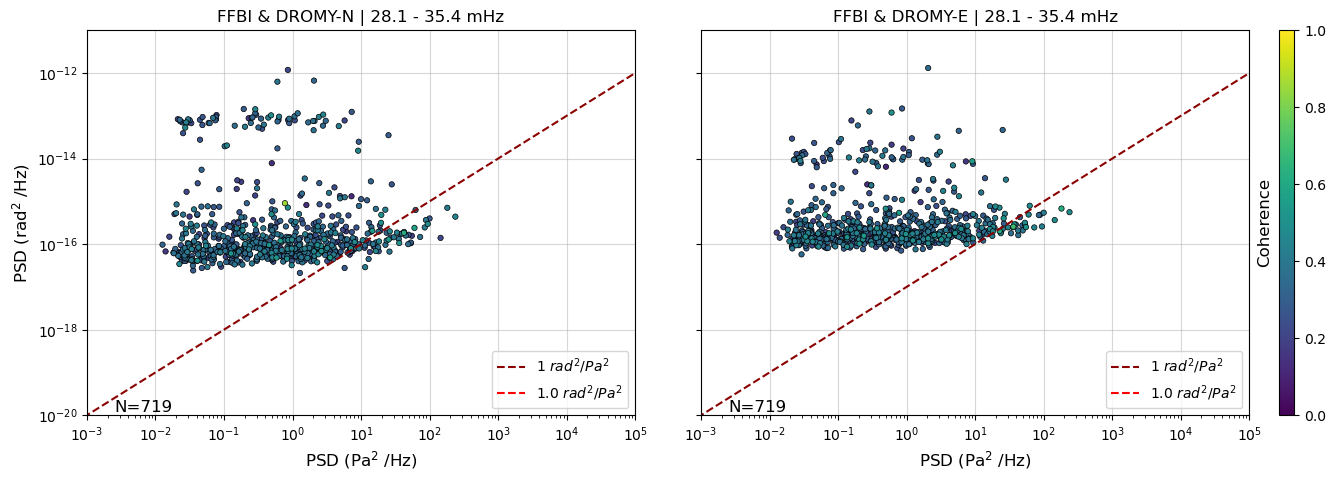

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 35.6 - 44.9 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 35.6 - 44.9 mHz')

Text(0.05, 0.04, 'N=719')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

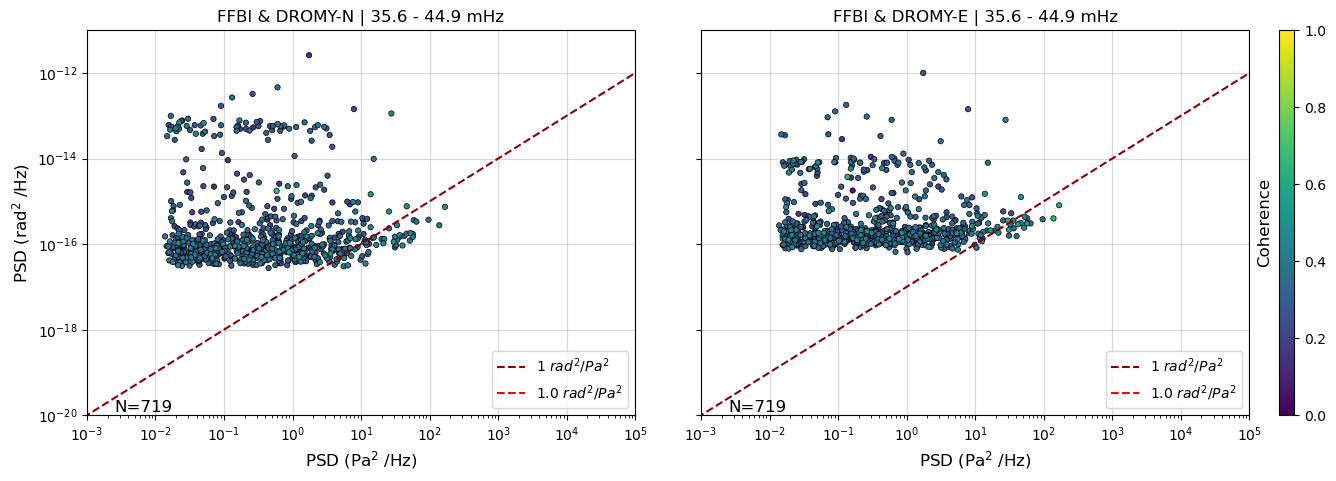

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 44.5 - 56.1 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 44.5 - 56.1 mHz')

Text(0.05, 0.04, 'N=719')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

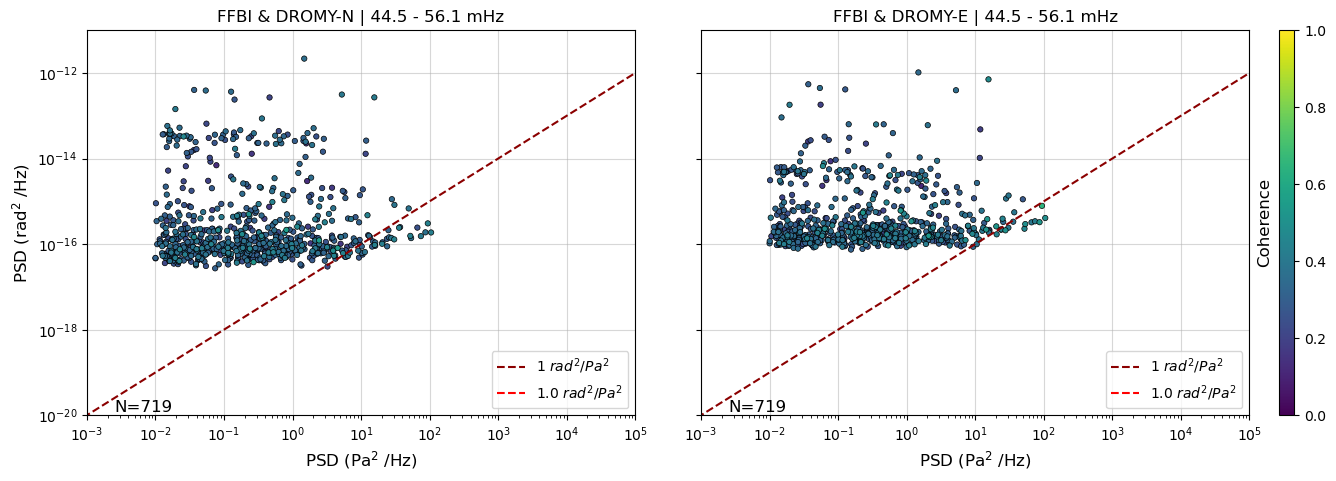

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 56.1 - 70.7 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 56.1 - 70.7 mHz')

Text(0.05, 0.04, 'N=719')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

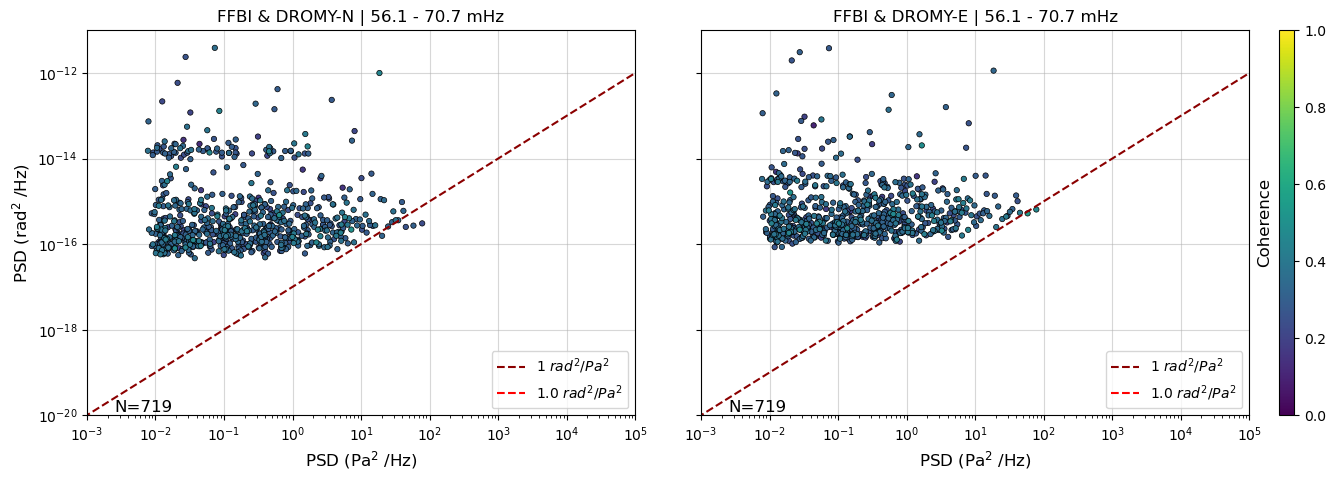

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 71.3 - 89.8 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 71.3 - 89.8 mHz')

Text(0.05, 0.04, 'N=719')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

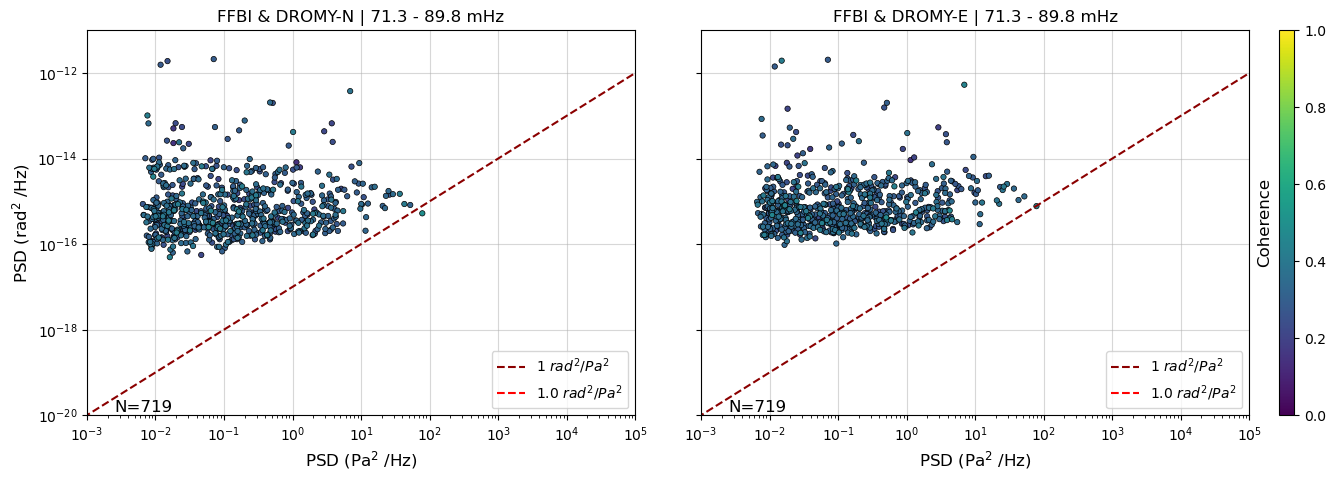

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 89.1 - 112.2 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 89.1 - 112.2 mHz')

Text(0.05, 0.04, 'N=719')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

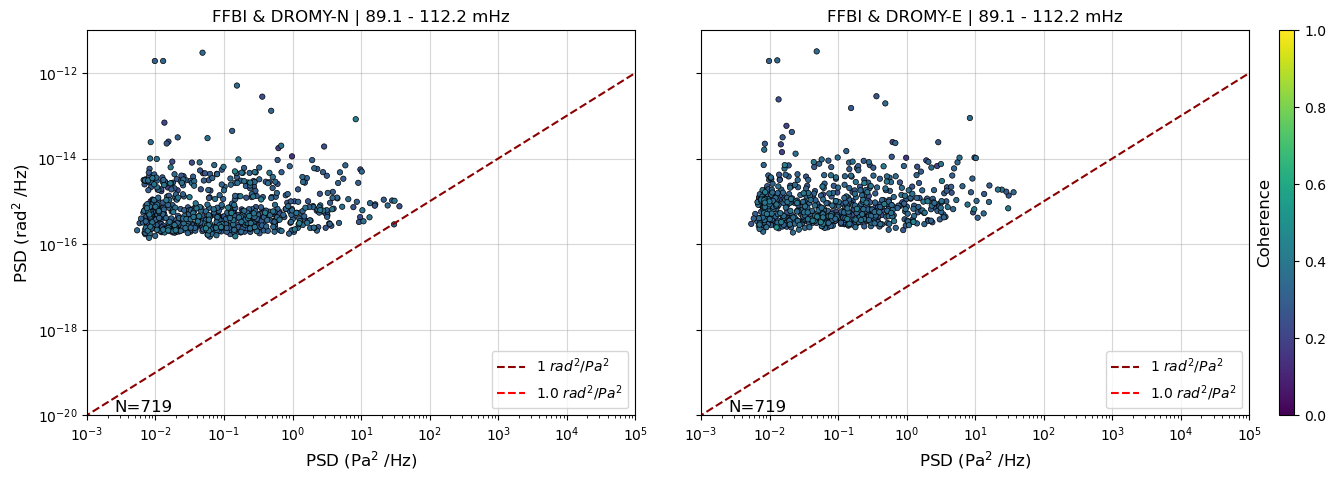

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 111.4 - 140.3 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 111.4 - 140.3 mHz')

Text(0.05, 0.04, 'N=719')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

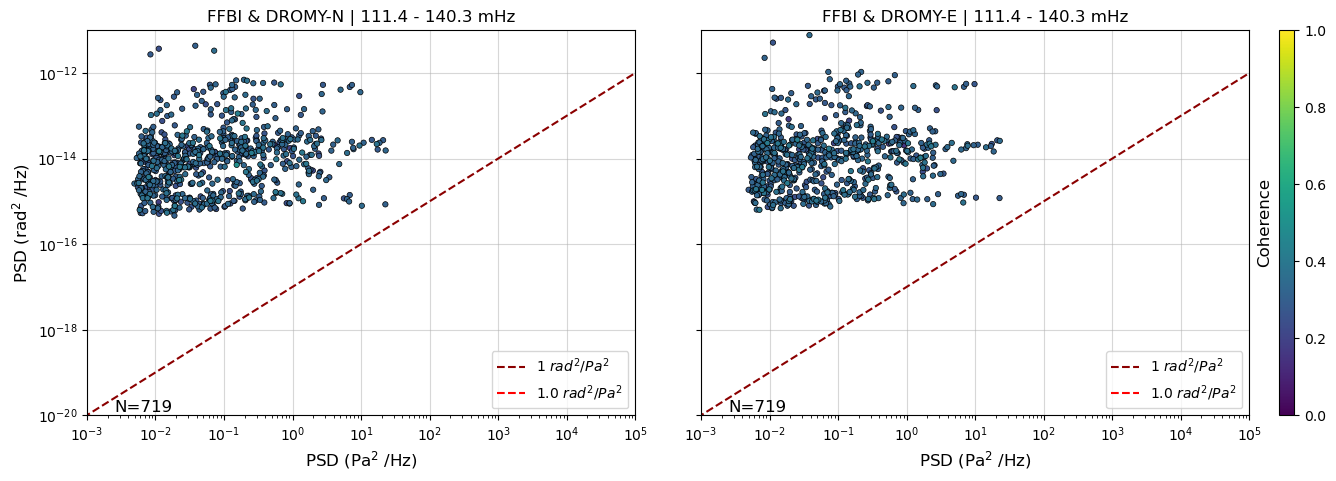

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 142.5 - 179.6 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 142.5 - 179.6 mHz')

Text(0.05, 0.04, 'N=719')

Text(0.05, 0.04, 'N=719')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

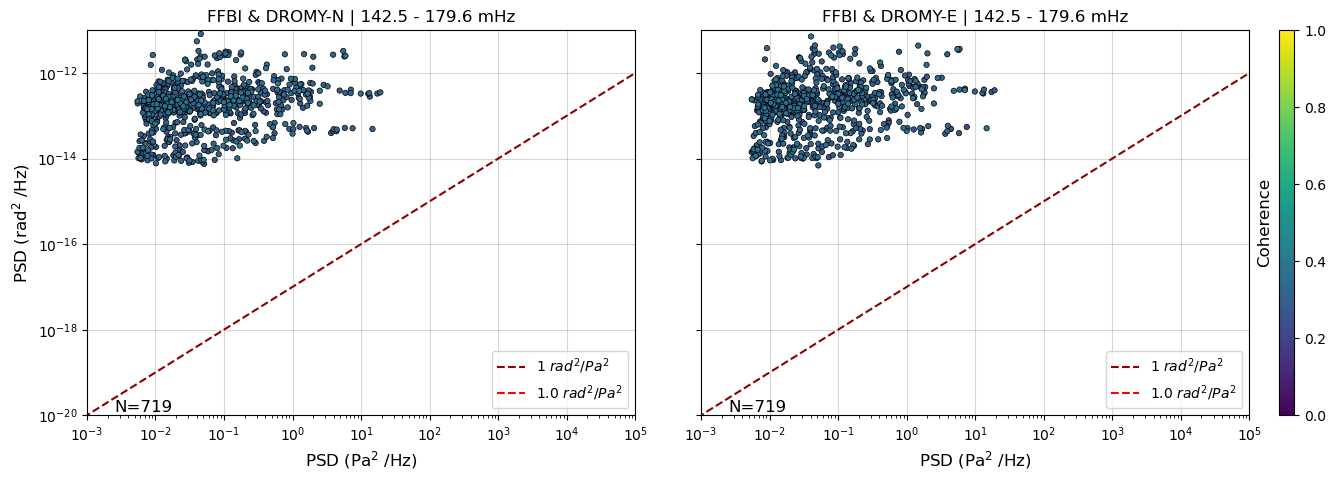

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 178.2 - 224.5 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 178.2 - 224.5 mHz')

Text(0.05, 0.04, 'N=719')

Text(0.05, 0.04, 'N=718')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

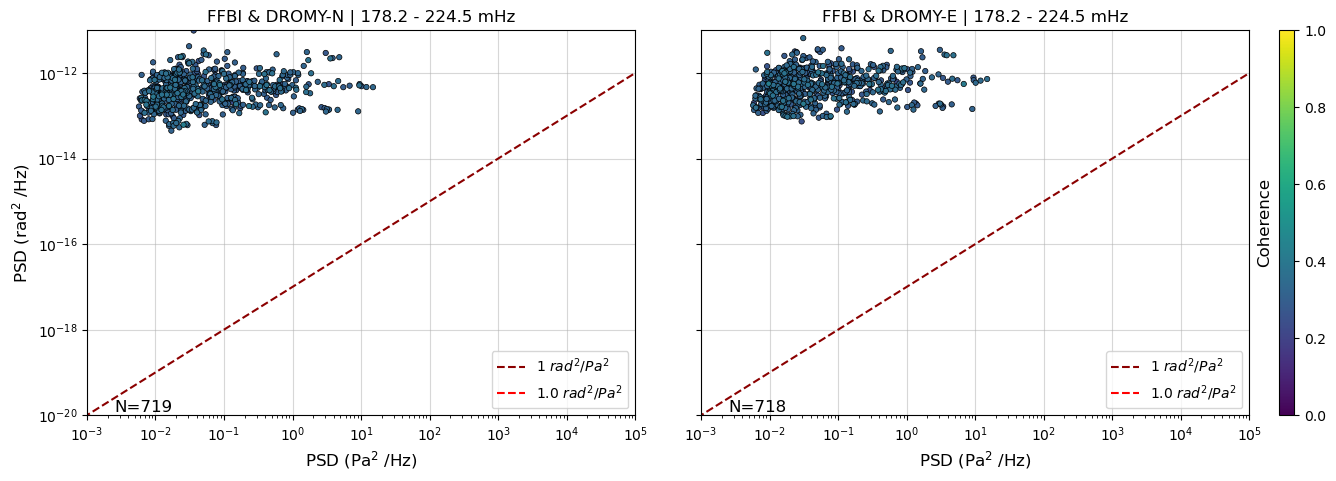

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 222.7 - 280.6 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 222.7 - 280.6 mHz')

Text(0.05, 0.04, 'N=718')

Text(0.05, 0.04, 'N=718')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

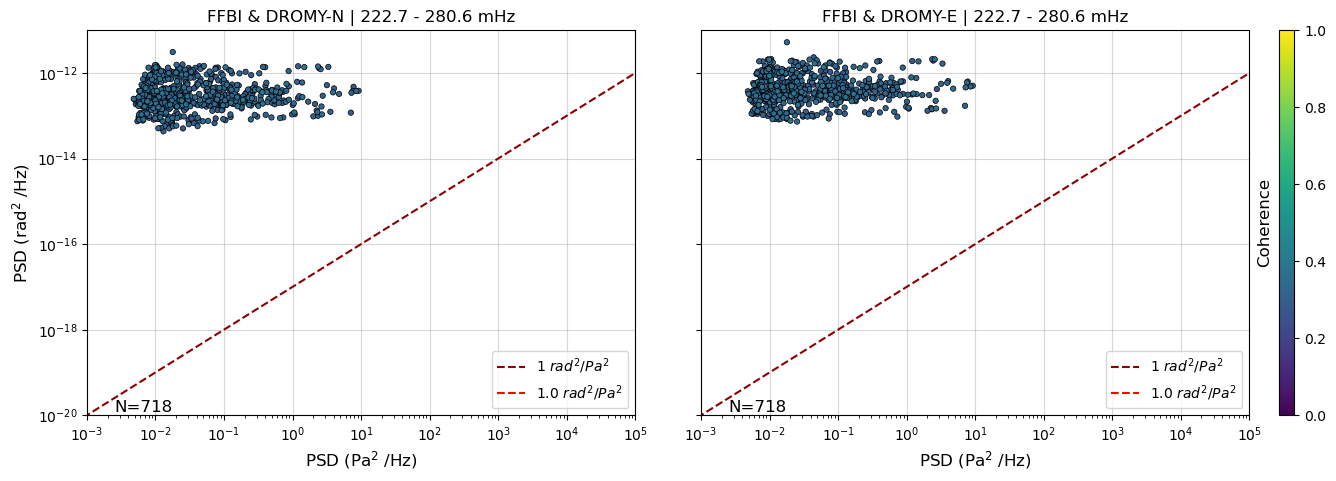

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 280.6 - 353.6 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 280.6 - 353.6 mHz')

Text(0.05, 0.04, 'N=718')

Text(0.05, 0.04, 'N=718')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

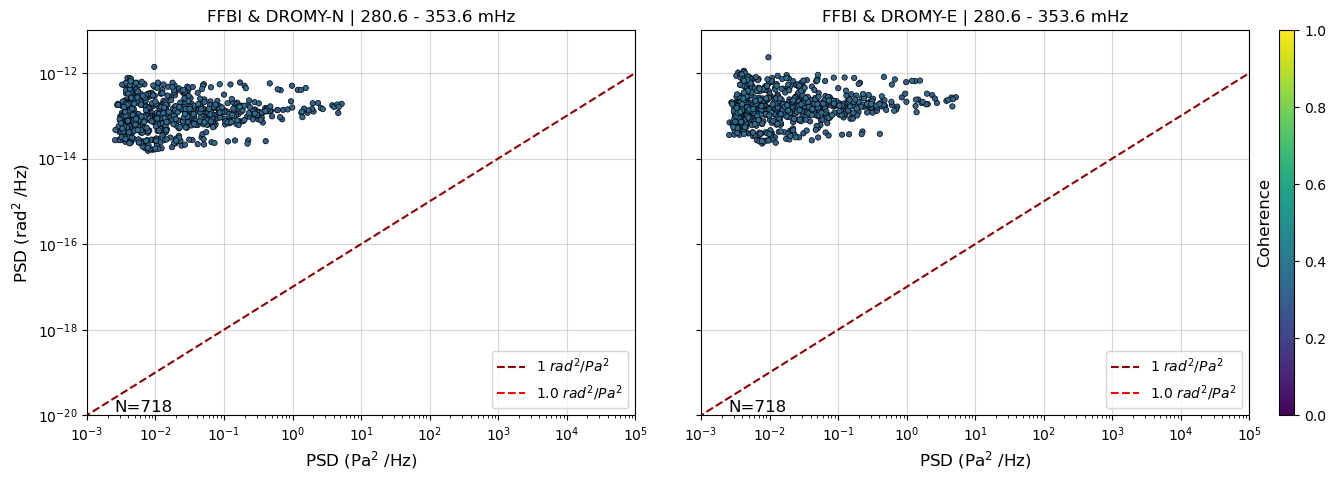

1.0


/home/brotzer/anaconda3/envs/obs2/lib/python3.9/site-packages/scipy/odr/_odrpack.py:870: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  warn(("Empty data detected for ODR instance. "


(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

(0.001, 100000.0)

(1e-20, 1e-11)

Text(0.5, 0, 'PSD (Pa$^2$ /Hz)')

Text(0.5, 1.0, 'FFBI & DROMY-N | 356.4 - 449.0 mHz')

Text(0.5, 1.0, 'FFBI & DROMY-E | 356.4 - 449.0 mHz')

Text(0.05, 0.04, 'N=719')

Text(0.05, 0.04, 'N=718')

Text(0, 0.5, 'PSD (rad$^2$ /Hz)')

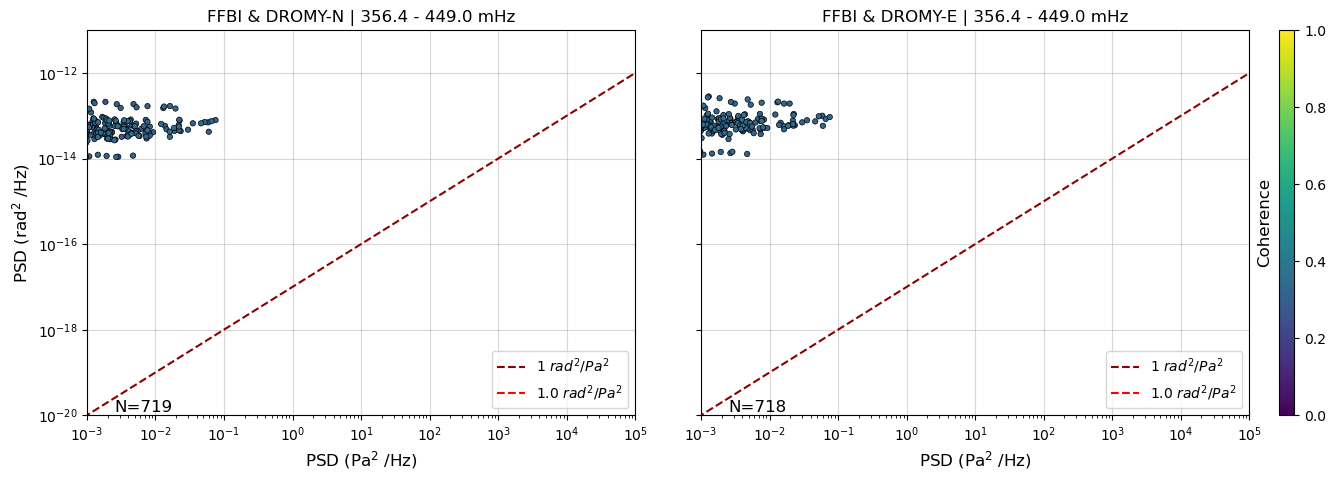

In [10]:
f_lower, f_upper, f_center = __get_octave_bands(1e-3, 4e-1, fband_type="one-third-octave", plot=False)

N_bands = dat1.shape[1] - 1

bands = dat1.keys()[1:]

## compliance
compl = pd.DataFrame()
compl['fl'] = f_lower
compl['fu'] = f_upper
compl['fc'] = f_center

complN, complE = np.ones(N_bands)*np.nan, np.ones(N_bands)*np.nan

for _n, band in enumerate(bands):


    # if not _n == 13:
    #     continue

    _dat0 = dat0.loc[:, ["dates", band]]
    _dat1 = dat1.loc[:, ["dates", band]]
    _dat2 = dat2.loc[:, ["dates", band]]

    _coh1 = coh1.loc[:, ["dates", band]]
    _coh2 = coh2.loc[:, ["dates", band]]

    ## join data frames based on dates and hour
    _df1 = pd.merge(left=_dat0, right=_dat1, how="inner", on="dates")
    _df2 = pd.merge(left=_dat0, right=_dat2, how="inner", on="dates")

    _df1 = pd.merge(left=_df1, right=_coh1, how="inner", on="dates")
    _df2 = pd.merge(left=_df2, right=_coh2, how="inner", on="dates")

    # ## remove NaN values
    _df1.dropna(inplace=True)
    _df2.dropna(inplace=True)

    ## remove large values
    _df1 = _df1[_df1.iloc[:, 2] < 1e-11]
    _df2 = _df2[_df2.iloc[:, 2] < 1e-11]

    ## reset the index
    _df1 = _df1.reset_index(drop=True)
    _df2 = _df2.reset_index(drop=True)

    _df1 = _df1.sort_values(by=band, ascending=True)
    _df2 = _df2.sort_values(by=band, ascending=True)

    xx1, yy1, ccoh1 = np.log10(_df1.iloc[:, 1]), np.log10(_df1.iloc[:, 2]), _df1.iloc[:, 3]
    xx2, yy2, ccoh2 = np.log10(_df2.iloc[:, 1]), np.log10(_df2.iloc[:, 2]), _df2.iloc[:, 3]

#     try:
#         pre1 = __quantile_regression(xx1, yy1, quantiles=[0.01, 0.5, 0.99])
#         pre2 = __quantile_regression(xx2, yy2, quantiles=[0.01, 0.5, 0.99])

#     except Exception as e:
#         print(e)
#         pass

    ## only select high coherence (=hc)
    coh_thres = 0.8
    df1_hc = _df1_high_coh = _df1[_df1.iloc[:, 3] > coh_thres]
    df2_hc = _df2_high_coh = _df2[_df2.iloc[:, 3] > coh_thres]

    xx1_hc, yy1_hc = np.log10(df1_hc.iloc[:, 1]), np.log10(df1_hc.iloc[:, 2])
    xx2_hc, yy2_hc = np.log10(df2_hc.iloc[:, 1]), np.log10(df2_hc.iloc[:, 2])


    try:
        odr1_slope, odr1_inter = __compute_orthogonal_distance_regression(xx1_hc, yy1_hc, xerr=None, yerr=None, bx=None, by=None)
        odr2_slope, odr2_inter = __compute_orthogonal_distance_regression(xx2_hc, yy2_hc, xerr=None, yerr=None, bx=None, by=None)

        complN[_n], complE[_n] = np.sqrt(odr1_slope), np.sqrt(odr2_slope)
        print(np.sqrt(odr1_slope))
    except Exception as e:
        print(e)
        pass



    ## ____________________________________________________________________

    Ncol, Nrow = 2, 1

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 5), sharey=True)

    font = 12

    cmap = plt.colormaps.get("viridis")

    plt.subplots_adjust(wspace=0.12)

    ca1 = ax[0].scatter(10**xx1, 10**yy1, s=15, c=ccoh1, edgecolors="black", lw=0.5, zorder=2, cmap=cmap, vmin=0, vmax=1)
    ca2 = ax[1].scatter(10**xx2, 10**yy2, s=15, c=ccoh2, edgecolors="black", lw=0.5, zorder=2, cmap=cmap, vmin=0, vmax=1)

#     try:
#         ax[0].plot(10**xx1, 10**pre1[0.01], color="k", zorder=1, ls=":", label="90%-fit")
#         ax[1].plot(10**xx2, 10**pre2[0.01], color="k", zorder=1, ls=":", label="90%-fit")
#     except Exception as e:
#         print(e)
#         pass

    ## add correlation estimate
    _xx = np.logspace(-7, 10)
    _yy = 1e-22 * _xx

    ax[0].plot(_xx, _yy + _xx*1e-17, color="darkred", ls="--", label="1 $rad^2/Pa^2$")
    ax[1].plot(_xx, _yy + _xx*1e-17, color="darkred", ls="--", label="1 $rad^2/Pa^2$")

    try:
        _xx = np.linspace(2*min(xx1), 2*max(xx1))
        for _i, (slope, intercept) in enumerate(zip([odr1_slope, odr2_slope], [odr1_inter, odr2_inter])):
            ax[_i].plot(10**(_xx), 10**(_xx*slope+intercept), color="red", ls="--", label=f"{round(slope,3)} $rad^2/Pa^2$")
    except Exception as e:
        print(e)
        pass

    for _i in range(Ncol):
        ax[_i].set_xscale("log")
        ax[_i].set_yscale("log")
        ax[_i].set_xlim(1e-3, 1e5)
        ax[_i].set_ylim(1e-20, 1e-11)
        ax[_i].grid(zorder=0, alpha=0.5)
        ax[_i].legend(loc=4)
        ax[_i].set_xlabel(r"PSD (Pa$^2$ /Hz)", fontsize=font)

    # ax[0].set_title(f"{name0.replace('_','-')} & {name1.replace('_','-')} | fc = {float(_df1.keys()[1][:-2])*1e3} mHz")
    # ax[1].set_title(f"{name0.replace('_','-')} & {name2.replace('_','-')} | fc = {float(_df2.keys()[1][:-2])*1e3} mHz")
    # ax[2].set_title(f"{name0.replace('_','-')} & {name3.replace('_','-')} | fc = {float(_df3.keys()[1][:-2])*1e3} mHz")
    ax[0].set_title(f"{name0.replace('_','-')} & {name1.replace('_','-')} | {round(f_lower[_n]*1e3, 1)} - {round(f_upper[_n]*1e3, 1)} mHz")
    ax[1].set_title(f"{name0.replace('_','-')} & {name2.replace('_','-')} | {round(f_lower[_n]*1e3, 1)} - {round(f_upper[_n]*1e3, 1)} mHz")

    ax[0].text(.05, .04, f"N={len(xx1)}", ha='left', va='top', transform=ax[0].transAxes, fontsize=font)
    ax[1].text(.05, .04, f"N={len(xx2)}", ha='left', va='top', transform=ax[1].transAxes, fontsize=font)

    ax[0].set_ylabel(r"PSD (rad$^2$ /Hz)", fontsize=font)

    ## add colorbar
    cbar_ax = fig.add_axes([0.92, 0.11, 0.01, 0.77]) #[left, bottom, width, height]
    cb = plt.colorbar(ca1, cax=cbar_ax)
    cb.set_label("Coherence", fontsize=font, labelpad=-50, color="black")

    plt.show();

    fig.savefig(config['path_to_figs']+f"all/{str(_n).rjust(3, '0')}_{name1}_{name2}_{band}Hz_all.png", format="png", dpi=200, bbox_inches='tight');


compl['N'] = complN
compl['E'] = complE


In [11]:
compl['N'] = complN
# compl['E'] = complE

## Compliance Plot

In [12]:
def __makeplot():

    Nrow, Ncol = 1, 1


    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(10, 5))

    ax.plot(compl['fc'], compl['N'], label="DROMY.N")
    ax.plot(compl['fc'], compl['E'], label="DROMY.E")

    ax.grid(ls=":", zorder=0)
    ax.legend(loc=1)

    ax.set_xscale("log")
    # ax.set_yscale("log")

    ax.set_xlim(1e-3, 1e0)

    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Compliance (rad/Pa)")

    plt.show();
    return fig

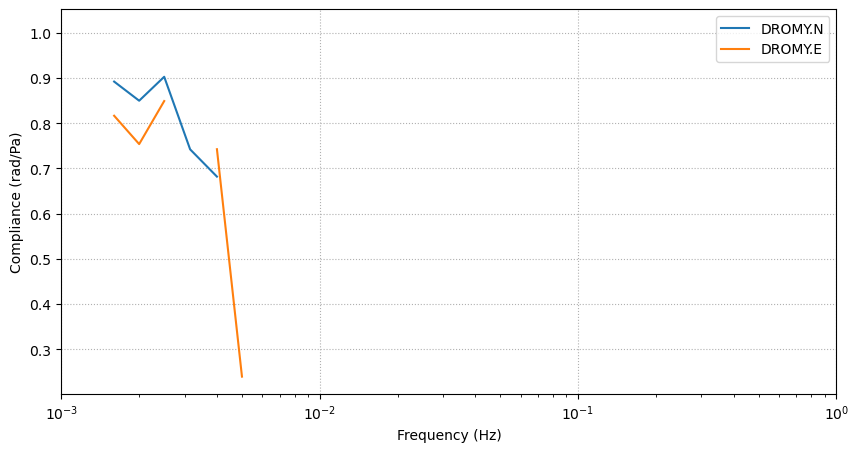

In [13]:
compl = compl.replace(1.0, np.nan)

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"DROMY_compliance.png", format="png", dpi=200, bbox_inches='tight')

In [14]:
# _df2_high_coh = _df2[_df2.iloc[:, 3] > 0.8]

# _x_high_coh = np.log10(_df2_high_coh.iloc[:, 1])
# _y_high_coh = np.log10(_df2_high_coh.iloc[:, 2])

# x = np.linspace(min(_x_high_coh), max(_x_high_coh), 100)
# a, b = __compute_orthogonal_distance_regression(_x_high_coh, _y_high_coh, xerr=None, yerr=None, bx=None, by=None)

# plt.scatter(10**_x_high_coh, 10**_y_high_coh)
# plt.plot(10**(x), 10**(x*a+b))
# plt.xscale("log")
# plt.yscale("log")
# print(x)